# `admission prediction app`

In [4]:
# emport the library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression   
import pickle

In [6]:
# import the dataset
df = pd.read_csv('admission dst.csv')
# check the first five rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# check general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# check for missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# drop unwanted columns
df.drop(['Serial No.'], axis=1, inplace=True)   
# check to confirm
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


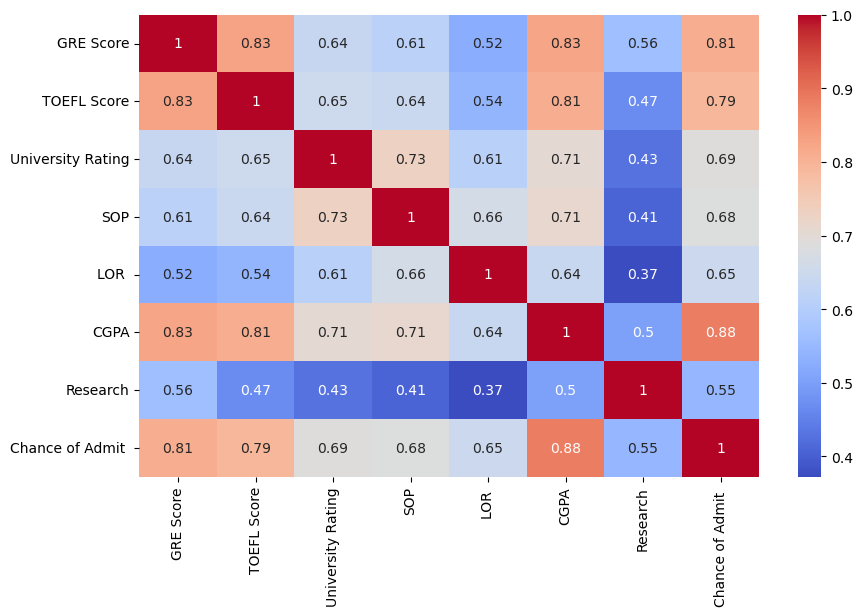

In [10]:
# check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
# split the data set into features and target variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [14]:
# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# train the model use linear regression
lr = LinearRegression()

In [17]:
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# make predictions
y_pred = lr.predict(X_test)

In [19]:
# checl the accuracy of the model
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.8188432567829629


In [20]:
# make predictions with new data
new_data = np.array([[330, 340, 4.5, 9.0, 1, 1, 0]])
new_pred = lr.predict(new_data)
print("Prediction for new data:", new_pred)

Prediction for new data: [0.55816241]


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
# serialize the model
with open('admission_model.pkl', 'wb') as f:
    pickle.dump(lr, f)